In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


In [ ]:
dataset = pd.read_csv('heart.csv')
print(dataset.info())
print(dataset.describe())
dataset.drop_duplicates(inplace=True)
dataset.isnull().sum()
# No null values so all good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1    164
0    138
Name: target, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



####################################################################################################


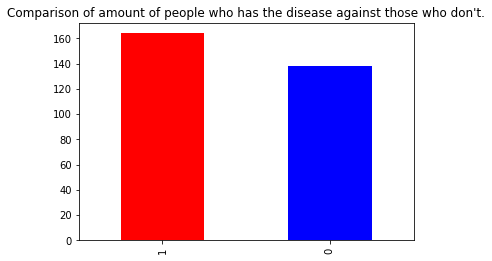

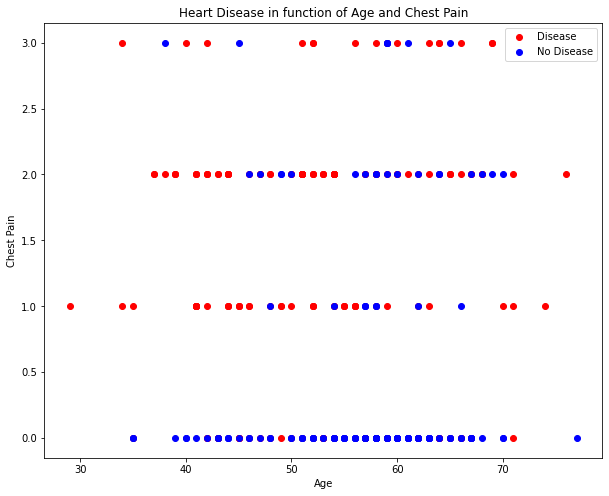

In [ ]:
def pieChart():
    labels = ['Male with Disease','Female with Disease']
    male = dataset[dataset['sex'] == 1]
    female = dataset[dataset['sex'] == 0]
    maleD = male[dataset['target']==1]
    femaleD = female[dataset['target']==1]
    values = [len(maleD), len(femaleD)]
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.update_layout(title_text="Comparison of gender with disease")
    fig.show()
    print("####################################################################################################")

def barPlot():
  # 1 Means have disease 0 means no
  print(dataset.target.value_counts())
  dataset.target.value_counts().plot(kind="bar", color=["red", "blue"],title="Comparison of amount of people who has the disease against those who don't.")
  #print(dataset.columns)

def scatterPlot():
  plt.figure(figsize=(10, 8))
  plt.scatter(dataset.age[dataset.target==1],dataset.cp[dataset.target==1],c="red")
  plt.scatter(dataset.age[dataset.target==0],dataset.cp[dataset.target==0],c="blue")
  plt.title("Heart Disease in function of Age and Chest Pain")
  plt.xlabel("Age")
  plt.ylabel("Chest Pain")
  plt.legend(["Disease", "No Disease"]);

barPlot()
scatterPlot()
pieChart()

In [ ]:
Features = dataset.drop('target', axis=1)
target = dataset['target']

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        print("Train Result")
        result = accuracy_score(y_train, pred) * 100
        answer = str(round(result, 2))
        print("Accuracy Score: " + answer + "%")
    elif train==False:
        pred = clf.predict(x_test)
        print("Test Result")
        result = accuracy_score(y_test, pred) * 100
        answer = str(round(result, 2))
        print("Accuracy Score: " + answer + "%")
x_train, x_test, y_train, y_test = train_test_split(Features, target, test_size=0.3, random_state=0)


In [ ]:
## Testing Accuracy score with Random Forest
random_forest = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(x_train, y_train)
print_score(random_forest, x_train, y_train, x_test, y_test, train=True)
print_score(random_forest, x_train, y_train, x_test, y_test, train=False)
#Good accuracy for both Train and Test

Train Result
Accuracy Score: 99.53%
Test Result
Accuracy Score: 81.32%


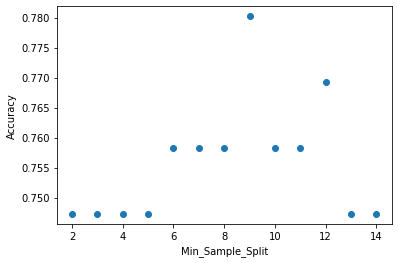

Train Result
Accuracy Score: 93.36%
Test Result
Accuracy Score: 75.82%


In [ ]:
#Testing Accuracy score with DecisionTree
from sklearn import tree
accuracy = []
min_sample = []
dt_xTrain = x_train
dt_yTrain = y_train
dt_xTest = x_test
dt_yTest = y_test
for ii in range(2,15):
    dt = tree.DecisionTreeClassifier(min_samples_split=ii)
    dt.fit(dt_xTrain,y_train)
    accuracy.append(dt.score(dt_xTest,dt_yTest))
    min_sample.append(ii)
plt.scatter(min_sample,accuracy)
plt.xlabel('Min_Sample_Split')
plt.ylabel('Accuracy')
plt.show();

tree = DecisionTreeClassifier(max_depth=6,min_samples_split=8, random_state=0)
tree.fit(dt_xTrain, y_train)
print_score(tree,dt_xTrain,y_train,dt_xTest,dt_yTest, train = True)
print_score(tree, dt_xTrain, y_train, dt_xTest, dt_yTest, train=False)

#Ok accuracy but the previous one was better.

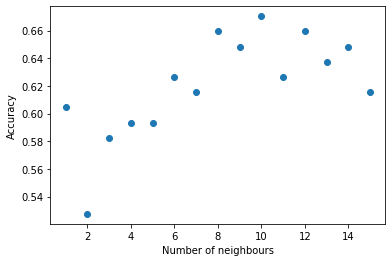

Train Result
Accuracy Score: 71.56%
Test Result
Accuracy Score: 67.03%


In [ ]:
# Testing accuracy with KNN
accuracy = []
num_neigh = []

k_xTrain = x_train
k_yTrain = y_train
k_xTest = x_test
k_yTest = y_test

for ii in range(1,16):
    KNN = KNeighborsClassifier(n_neighbors=ii)
    KNN.fit(k_xTrain,k_yTrain)
    accuracy.append(KNN.score(k_xTest,k_yTest))
    num_neigh.append(ii)
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

knnClassy = KNeighborsClassifier(n_neighbors=10)
knnClassy.fit(k_xTrain, k_yTrain)

print_score(knnClassy, k_xTrain, k_yTrain, k_xTest, k_yTest, train=True)
print_score(knnClassy, k_xTrain, k_yTrain, k_xTest, k_yTest, train=False)

#Terrible accuracy for both Train and Test.

In [ ]:
# In conclusion RandomForest has the highest accuracy for both Test and Train samples so we shall use that instead of the other 2 models.

In [ ]:
def plot_matrix(pred,y_test,y_train, train =True):
  if train==True:
                print("Confusion Matrix: ")
                print(confusion_matrix(y_train, pred))
                matrix = confusion_matrix(y_train, pred)
                plot_confusion_matrix(matrix, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Reds)
                plt.title("Confusion Matrix for Train Dataset")
                plt.xticks(range(2), ["Does not have Disease","Have Disease"], fontsize=16)
                plt.yticks(range(2), ["Does not have Disease","Have Disease"], fontsize=16)
                plt.show()
  elif train==False:
                print("Confusion Matrix: ")
                print(confusion_matrix(y_test, pred))
                matrix1 = confusion_matrix(y_test, pred)
                plot_confusion_matrix(matrix1, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Greens)
                plt.title("Confusion Matrix for Test Dataset")
                plt.xticks(range(2), ["Does not have Disease","Have Disease"], fontsize=16)
                plt.yticks(range(2), ["Does not have Disease","Have Disease"], fontsize=16)
                plt.show()

Confusion Matrix: 
[[ 92   1]
 [  0 118]]


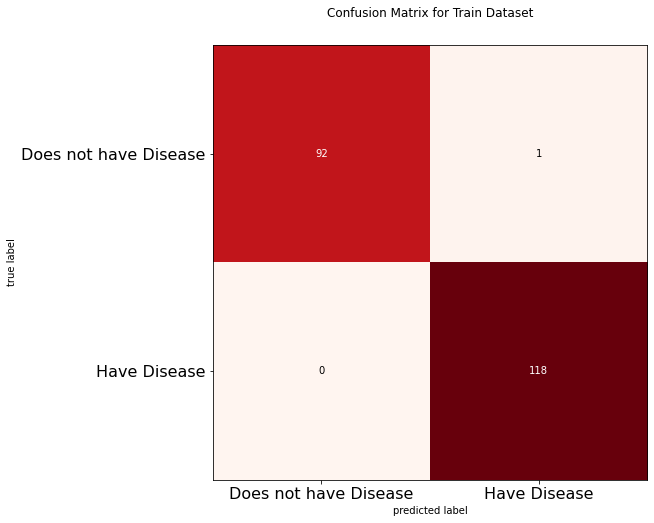

Confusion Matrix: 
[[36  9]
 [ 8 38]]


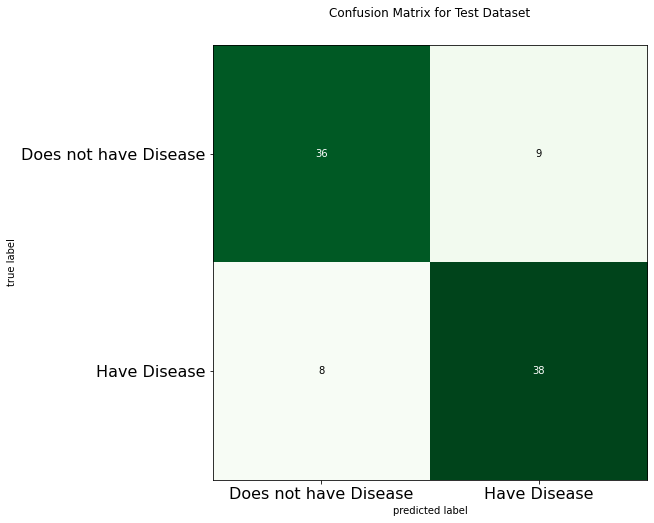

In [ ]:
random_forest = RandomForestClassifier(n_estimators=15, random_state=0)
random_forest.fit(x_train, y_train)

TrainForest_pred = random_forest.predict(x_train)
TestForest_pred = random_forest.predict(x_test)

plot_matrix(TrainForest_pred,y_test,y_train, train=True)
plot_matrix(TestForest_pred,y_test,y_train, train=False)
